In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor 
import pickle #to save the data
%matplotlib inline

import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

# Classification Model

In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import r2_score 
import pickle #to save the data
%matplotlib inline

import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [78]:
data=pd.read_csv(r'C:\Users\yoges\OneDrive\Desktop\avocado.csv')

In [79]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [81]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [82]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observations 

-No null

-11 numeric columns and 3 object columns 

- every feature has different scale range  so scaler can help here 

- Columns only informing about bags which not relevent for predictions anf Unamed feature is giving info about index so lets drop them 


In [83]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [84]:
data.drop(['Unnamed: 0','XLarge Bags','Small Bags','Total Bags','Large Bags','year'], axis=1, inplace=True)

We deleted Year column as we have same feature in Date column

In [85]:
data[['Year','Month','Date']] = data['Date'].str.split("-",expand = True)

providing the featue name according to data

In [86]:
data[['Year','Month','Date']] = data[['Year','Month','Date']].astype(int)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  object 
 7   region        18249 non-null  object 
 8   Year          18249 non-null  int32  
 9   Month         18249 non-null  int32  
dtypes: float64(5), int32(3), object(2)
memory usage: 1.2+ MB


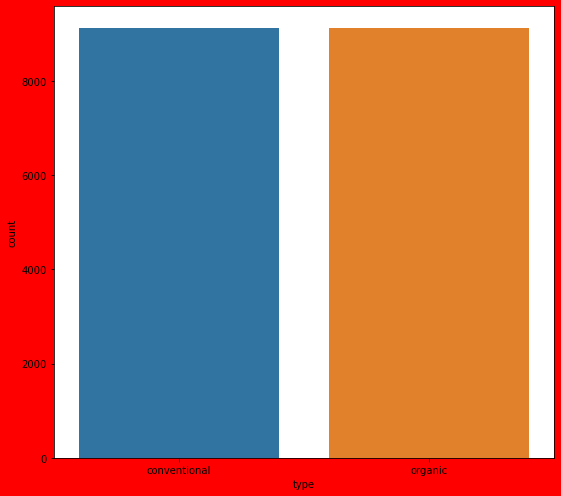

In [88]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['type']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['type'])
    plotnumber += 1
plt.tight_layout()

In [89]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [90]:
data['region'].nunique()

54

In [91]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [92]:
data.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Year,Month
Date,1.000000,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,0.004475,0.010621
AveragePrice,0.027386,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,0.093197,0.162409
Total Volume,-0.009747,-0.192752,1.000000,0.977863,0.974181,0.872202,0.017193,-0.024689
4046,-0.010159,-0.208317,0.977863,1.000000,0.926110,0.833389,0.003353,-0.025803
4225,-0.012393,-0.172928,0.974181,0.926110,1.000000,0.887855,-0.009559,-0.022108
4770,-0.009009,-0.179446,0.872202,0.833389,0.887855,1.000000,-0.036531,-0.033424
Year,0.004475,0.093197,0.017193,0.003353,-0.009559,-0.036531,1.000000,-0.177050
Month,0.010621,0.162409,-0.024689,-0.025803,-0.022108,-0.033424,-0.177050,1.000000


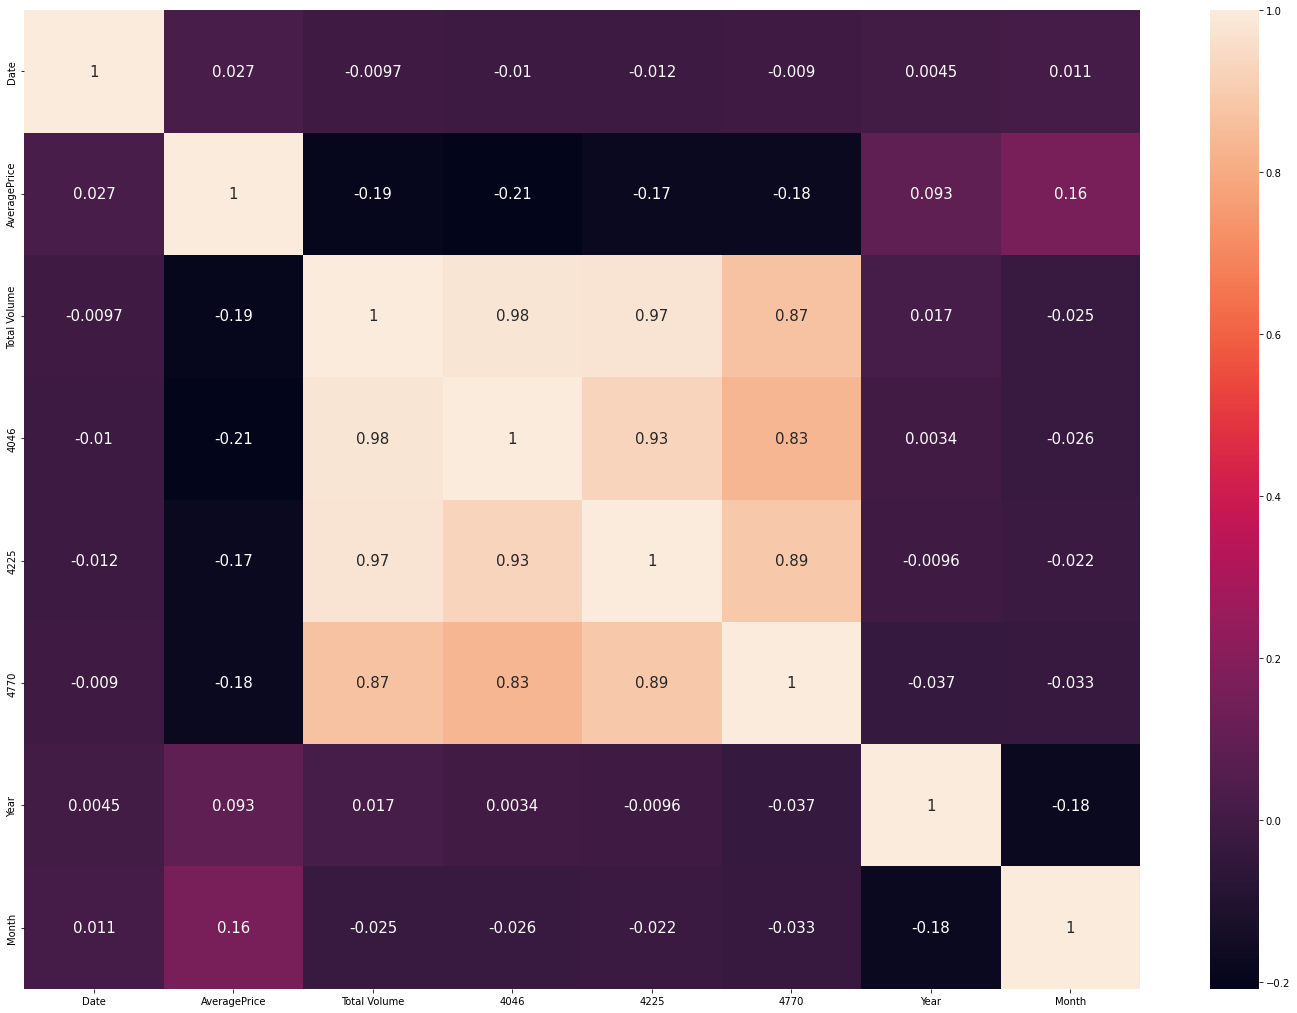

In [93]:
plt.figure(figsize = [25, 18])
sns.heatmap(data.corr(), annot = True,annot_kws={'size':15})
plt.show()

features-4046 ,4225,4770 are highly correlated with each other because they all are sold information

-Some of them are negatively correlated with data

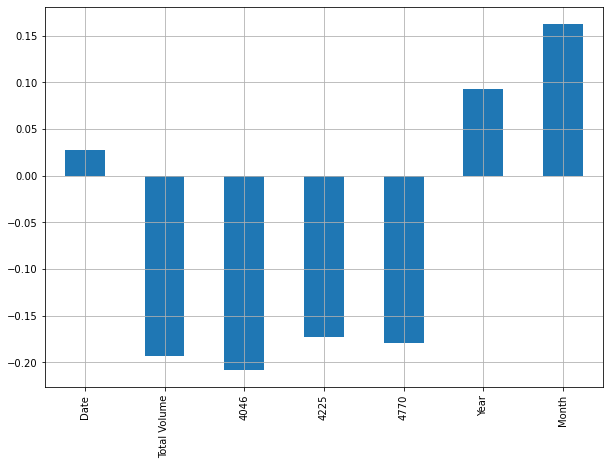

In [94]:
data.drop('AveragePrice',axis=1).corrwith(data.AveragePrice).plot(kind='bar',grid=True,figsize=(10,7),)
plt.show()

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  object 
 7   region        18249 non-null  object 
 8   Year          18249 non-null  int32  
 9   Month         18249 non-null  int32  
dtypes: float64(5), int32(3), object(2)
memory usage: 1.2+ MB


lets change objective to numeric

In [96]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [97]:
ord_enc=OrdinalEncoder(categories=[['conventional','organic']])
df1=ord_enc.fit_transform(data[['type']])
df1

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [98]:
data['type']=df1

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  float64
 7   region        18249 non-null  object 
 8   Year          18249 non-null  int32  
 9   Month         18249 non-null  int32  
dtypes: float64(6), int32(3), object(1)
memory usage: 1.2+ MB


In [100]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [101]:
ord_enc=OrdinalEncoder(categories=[['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']])
df1=ord_enc.fit_transform(data[['region']])
df1

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [53.],
       [53.],
       [53.]])

In [102]:
data['region']=df1

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  float64
 7   region        18249 non-null  float64
 8   Year          18249 non-null  int32  
 9   Month         18249 non-null  int32  
dtypes: float64(7), int32(3)
memory usage: 1.2 MB


<AxesSubplot:xlabel='region', ylabel='Count'>

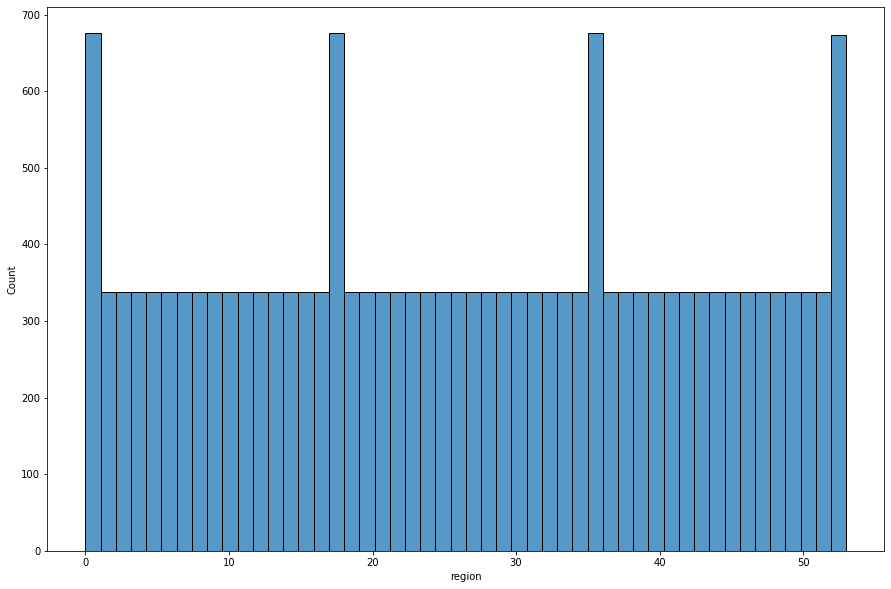

In [104]:
plt.figure(figsize=(15,10))
sns.histplot(data['region'], bins=50)

we see region column data has mostly equal data

In [105]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type',
       'region', 'Year', 'Month'],
      dtype='object')

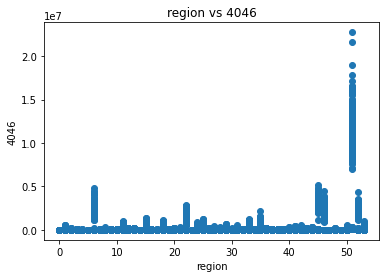

In [106]:
plt.scatter(data['region'],data['4046'])
plt.xlabel('region')
plt.ylabel('4046')
plt.title('region vs 4046')
plt.show()

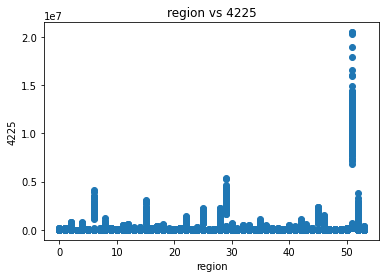

In [107]:
plt.scatter(data['region'],data['4225'])
plt.xlabel('region')
plt.ylabel('4225')
plt.title('region vs 4225')
plt.show()

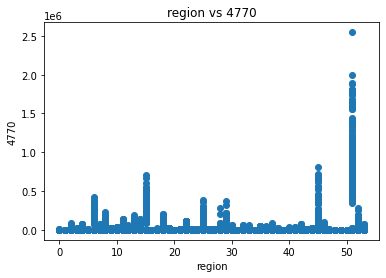

In [108]:
plt.scatter(data['region'],data['4770'])
plt.xlabel('region')
plt.ylabel('4770')
plt.title('region vs 4770')
plt.show()

can see some outliers

<AxesSubplot:xlabel='Year', ylabel='count'>

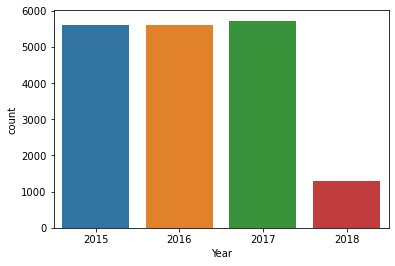

In [110]:
sns.countplot(x='Year',data=data)

<AxesSubplot:xlabel='Month', ylabel='count'>

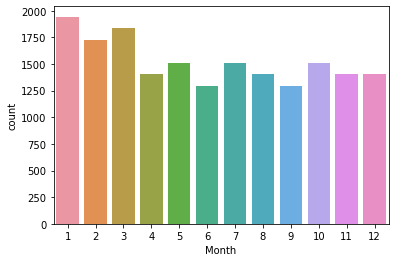

In [111]:
sns.countplot(x='Month',data=data)

<AxesSubplot:xlabel='Date', ylabel='Count'>

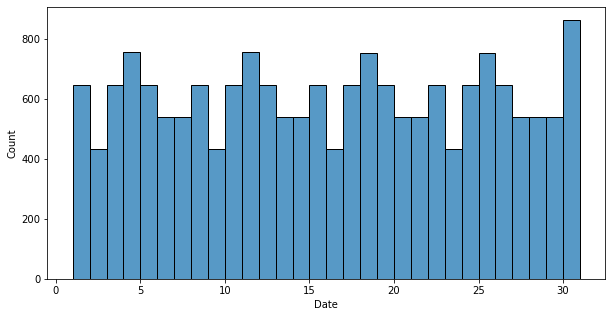

In [112]:
plt.figure(figsize=(10,5))
sns.histplot(data['Date'], bins=30)

For every 6 day there is hike in sell i.e is may be on saturday or sunday daily sales range start from 40- 60

<AxesSubplot:xlabel='region', ylabel='Count'>

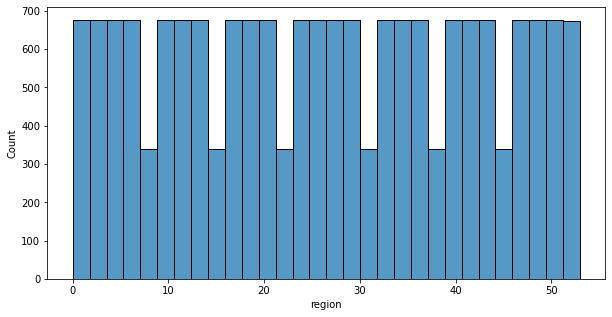

In [113]:
plt.figure(figsize=(10,5))
sns.histplot(data['region'], bins=30)

<AxesSubplot:xlabel='Date', ylabel='Count'>

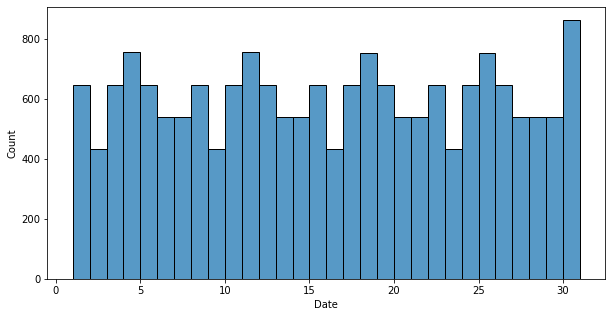

In [114]:
plt.figure(figsize=(10,5))
sns.histplot(data['Date'], bins=30)

maximum avocado are sold in month of 1,2,3 and minimum in the month of 6

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  float64
 7   region        18249 non-null  float64
 8   Year          18249 non-null  int32  
 9   Month         18249 non-null  int32  
dtypes: float64(7), int32(3)
memory usage: 1.2 MB


Now every feature is in numeric value

<Figure size 360x720 with 0 Axes>

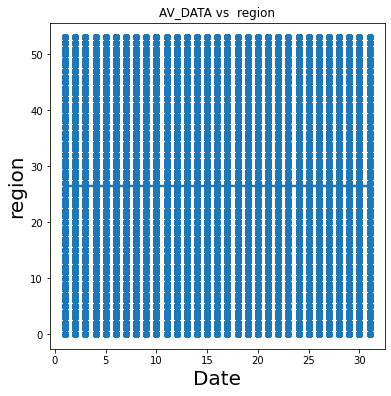

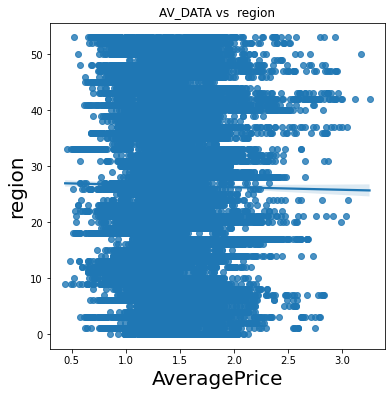

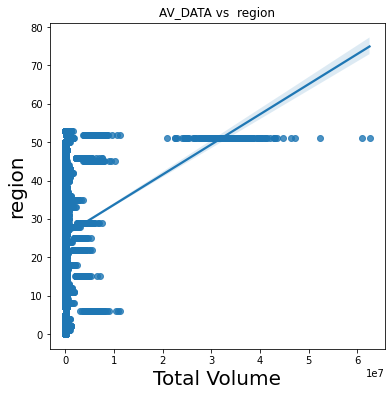

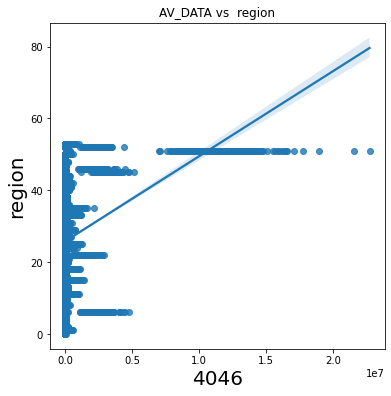

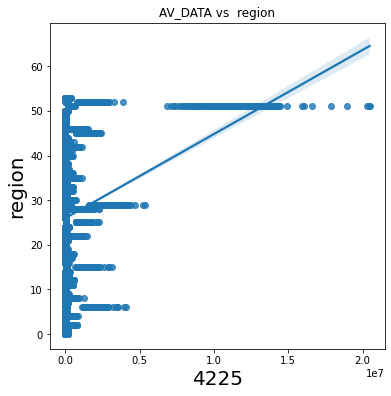

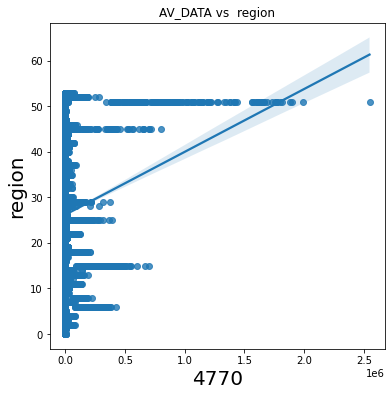

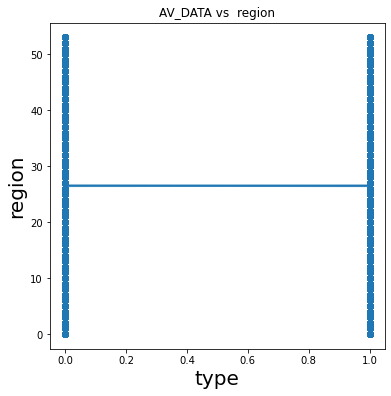

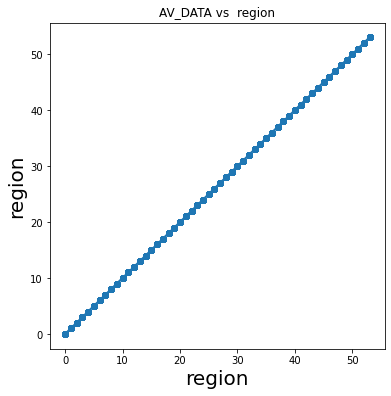

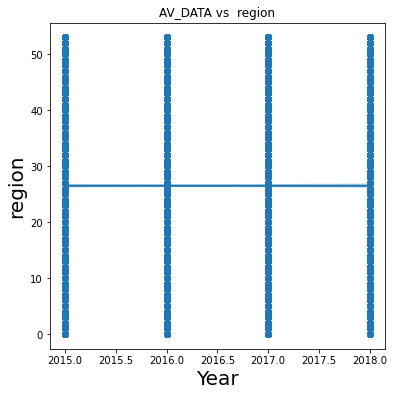

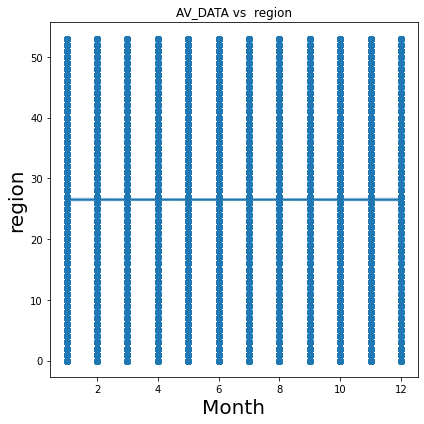

In [116]:
plt.figure(figsize = (5,10), facecolor = 'blue')
plotnumber = 1

for column in data:
    if plotnumber <=30:
        plt.figure(figsize = (6,6))
        sns.regplot(data[column], data['region'])
        plt.title('AV_DATA vs  region')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('region',fontsize=20)
        
plt.tight_layout()

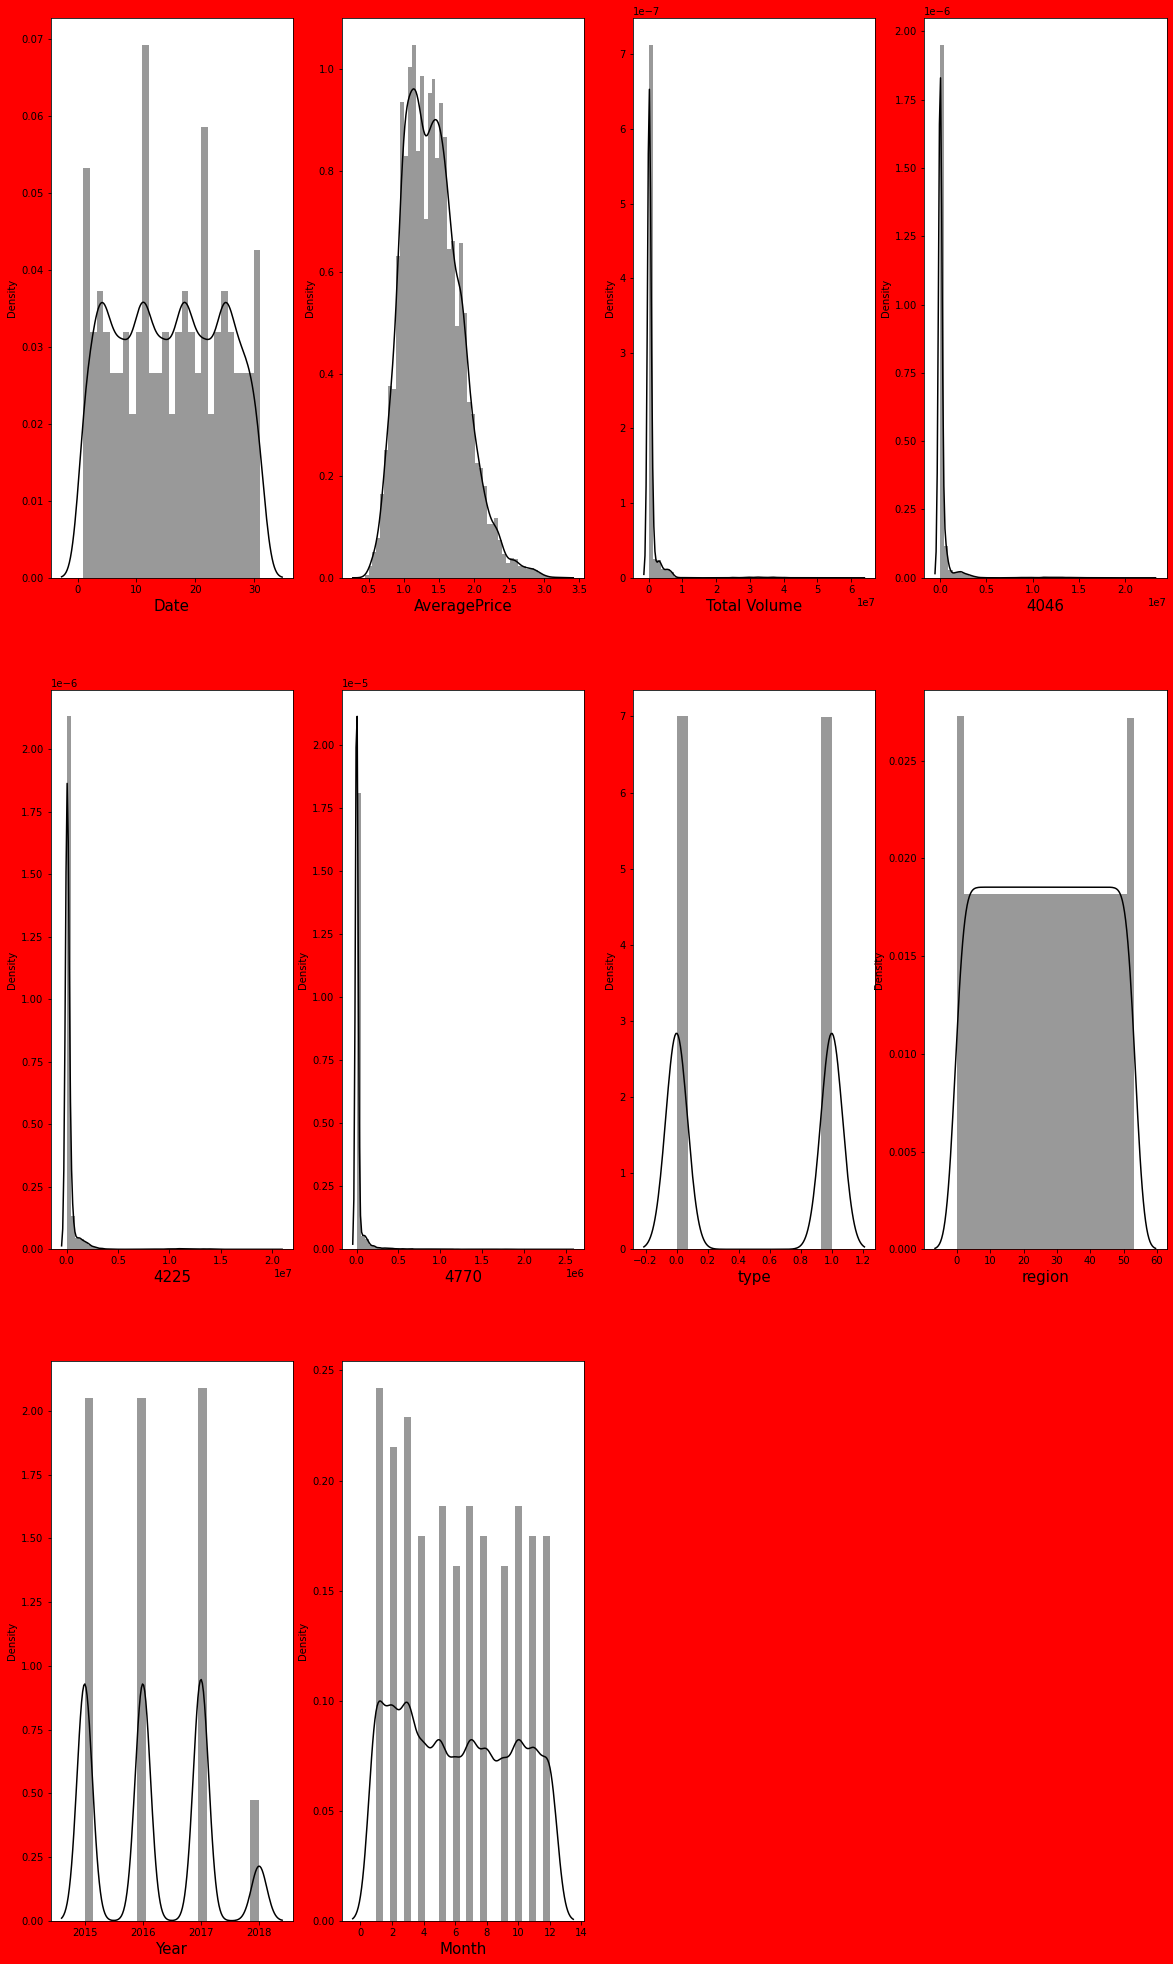

In [117]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

we can see the skweness

# Skweness

In [118]:
#Checking for Skewness
data.skew()

Date             0.014310
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
type             0.000329
region           0.000030
Year             0.215339
Month            0.106617
dtype: float64

Power Transform for removing the skweness

In [119]:
scaler=PowerTransformer(method='yeo-johnson')

In [120]:
data[['Total Volume','4046','4225','4770']] = scaler.fit_transform(data[['Total Volume','4046','4225','4770']].values)

In [121]:
data.skew()

Date            0.014310
AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
type            0.000329
region          0.000030
Year            0.215339
Month           0.106617
dtype: float64

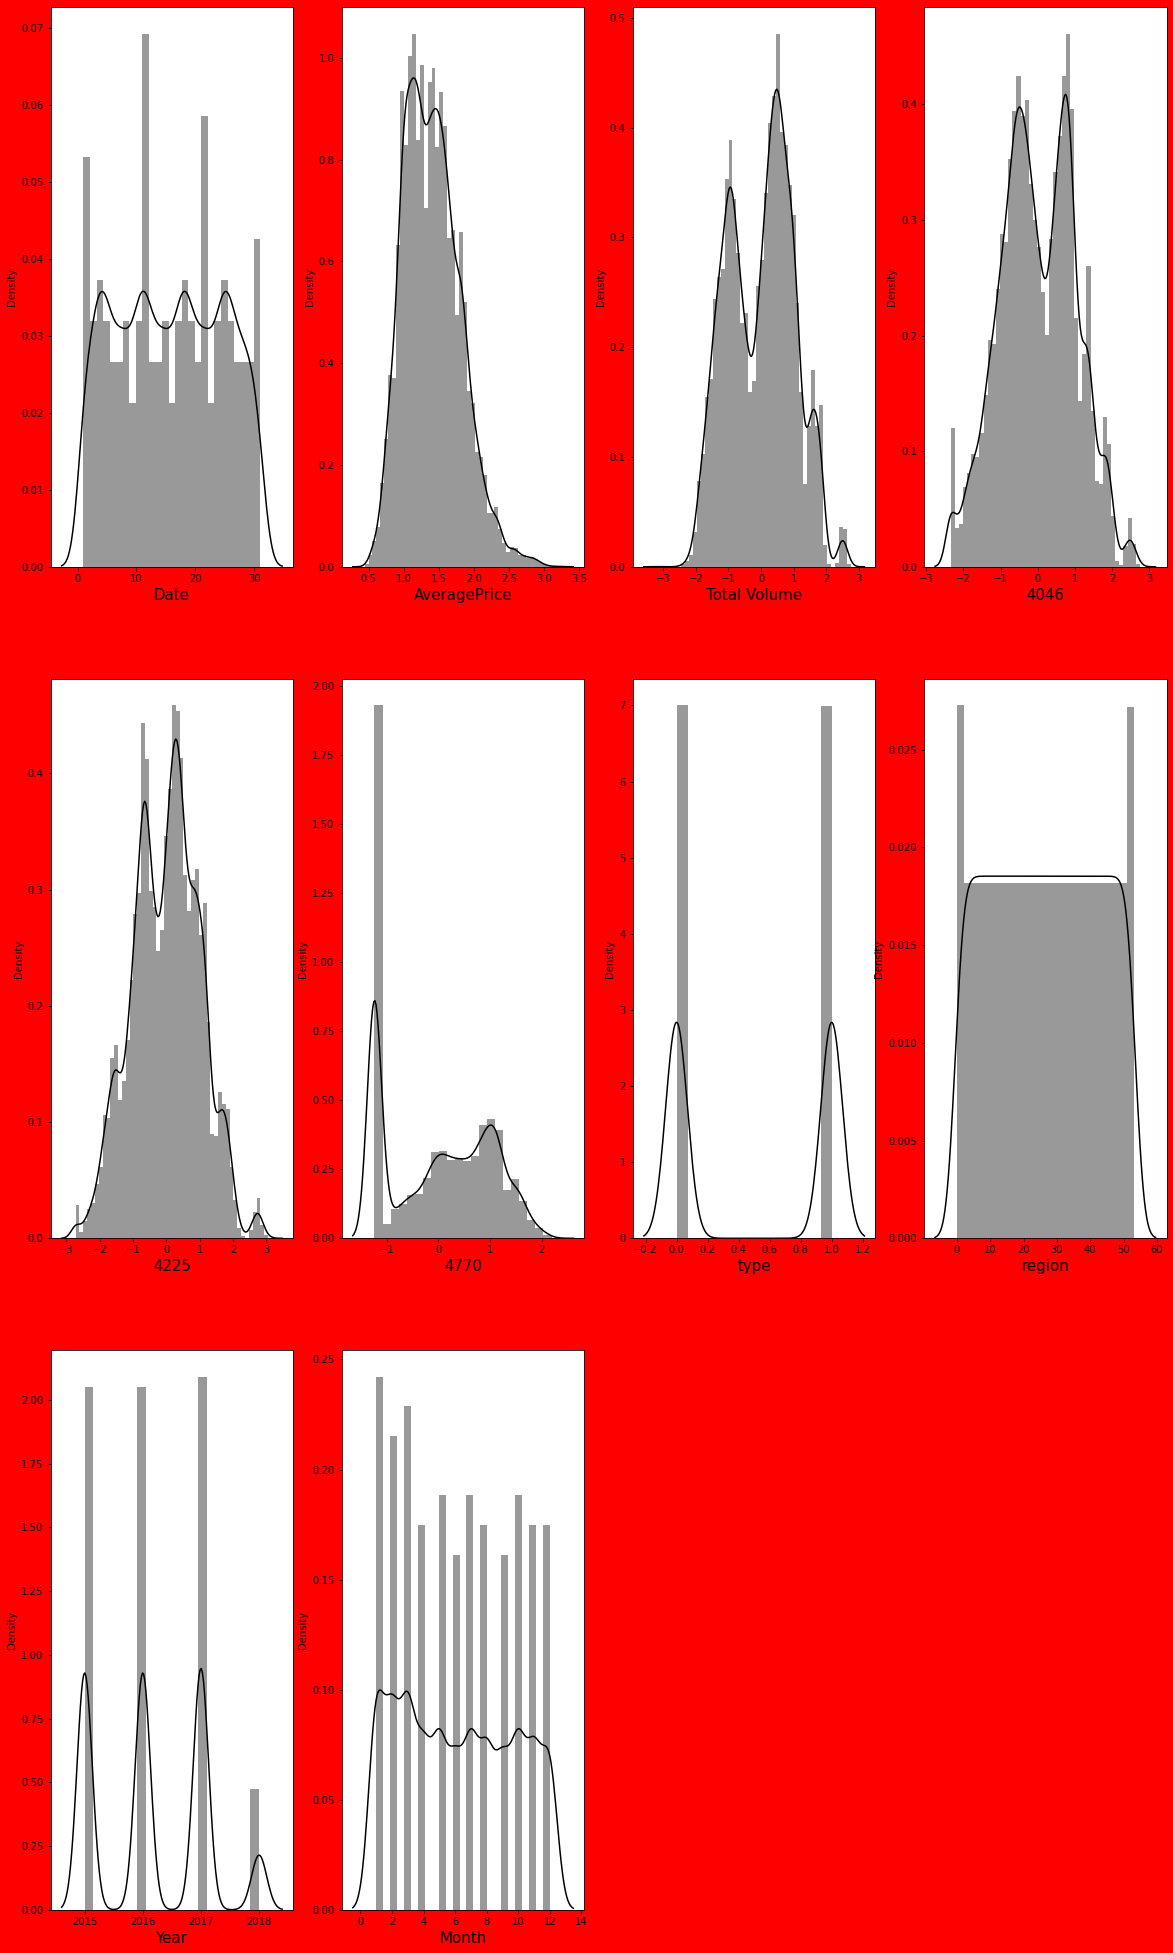

In [122]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

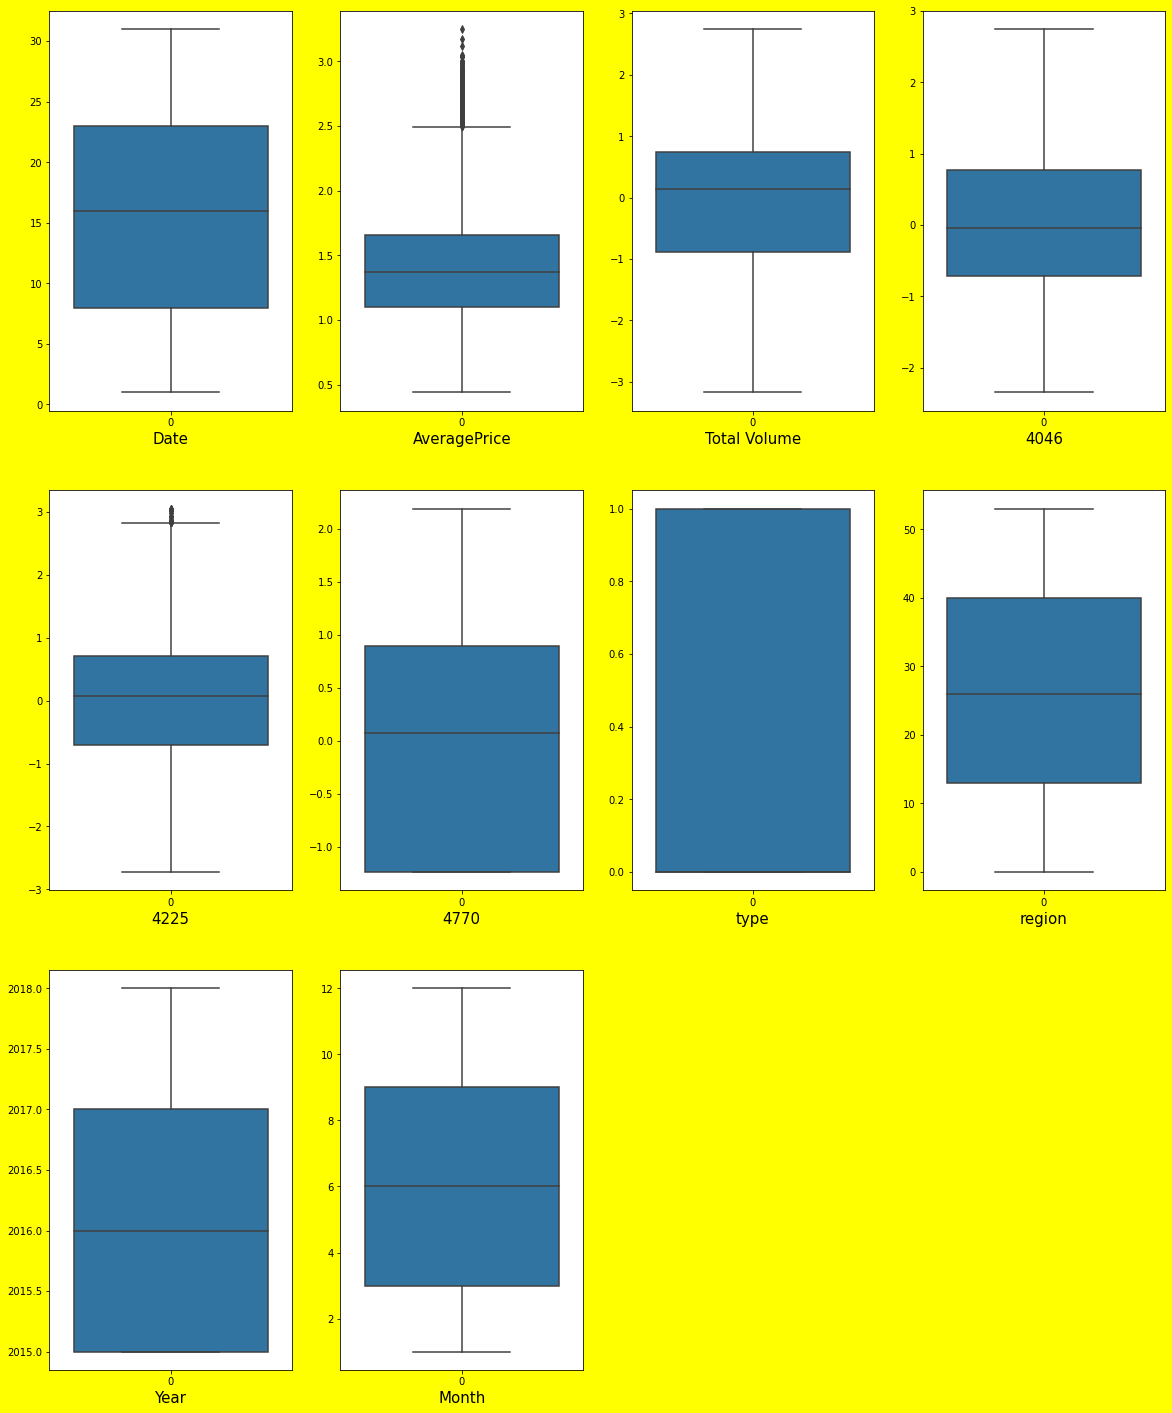

In [123]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1
for column in data:
    if graph<=17:
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [124]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type',
       'region', 'Year', 'Month'],
      dtype='object')

In [127]:
from scipy.stats import zscore
z_score= zscore(data[['4225','AveragePrice']])
abs_z_score=np.abs(z_score) #apply he formula and get the scaled data 

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,Year,Month
count,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000
mean,15.664618,1.392781,0.009192,0.007678,0.005750,0.008452,0.494990,26.426341,2016.142723,6.159829
std,8.773413,0.381754,0.998738,0.999762,1.001340,0.999661,0.499989,15.573213,0.941191,3.538090
min,1.000000,0.440000,-3.172920,-2.343573,-2.725056,-1.238310,0.000000,0.000000,2015.000000,1.000000
25%,8.000000,1.100000,-0.874150,-0.703006,-0.706750,-1.238310,0.000000,13.000000,2015.000000,3.000000
50%,16.000000,1.370000,0.153529,-0.030496,0.083929,0.091863,0.000000,26.000000,2016.000000,6.000000
75%,23.000000,1.650000,0.740564,0.773017,0.715902,0.901796,1.000000,40.000000,2017.000000,9.000000
max,31.000000,2.540000,2.639381,2.644951,2.980160,2.143236,1.000000,53.000000,2018.000000,12.000000


In [128]:
data.shape

(18063, 10)

less than 2%

# Scalling

In [129]:
scaler=StandardScaler()
X=data.drop('region',axis=1)

In [130]:
x = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [131]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.001662,Date
1,2.072672,AveragePrice
2,21.303365,Total Volume
3,5.933925,4046
4,9.678804,4225
5,3.979255,4770
6,3.565993,type
7,1.270473,Year
8,1.113136,Month


Total Volume can be ignored as Total number of avocados sold

In [133]:
scaler=StandardScaler()
X=data.drop('region',axis=1)
X_scaled=scaler.fit_transform(X)

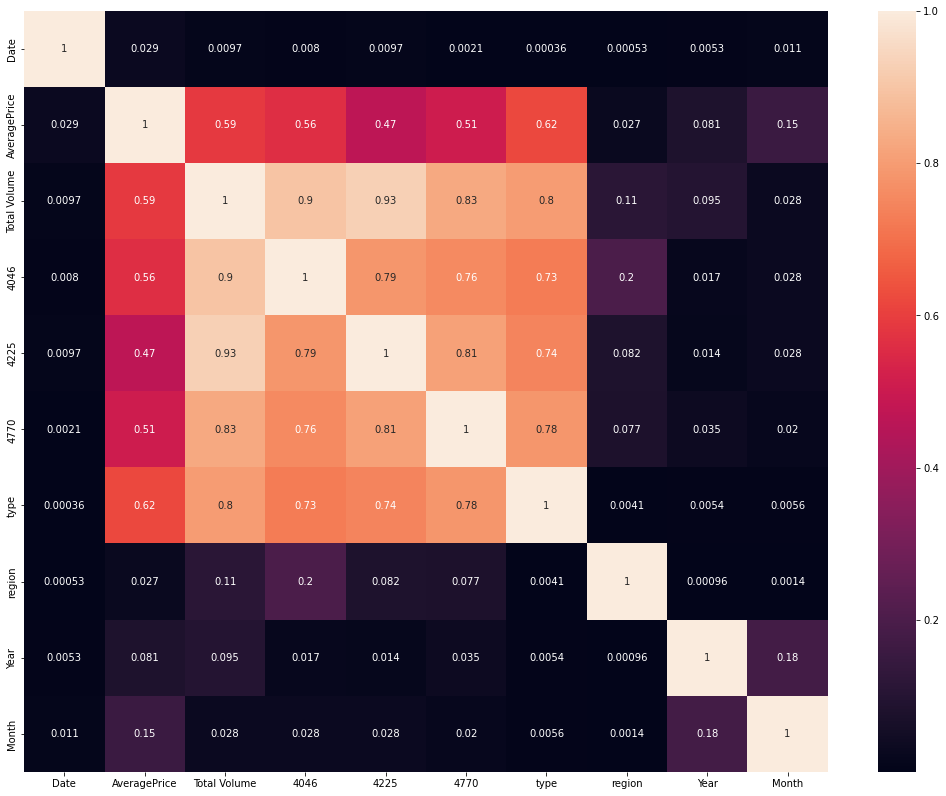

In [134]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

# PCA

In [135]:
from sklearn.decomposition import PCA

In [136]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 0.10145944, -2.08281759,  1.22898011, ...,  0.25725057,
        -0.85268608,  0.00401527],
       [-0.00372799, -2.06470551,  0.44844094, ...,  0.25920302,
        -0.80346226,  0.02258304],
       [ 0.74959526, -2.00113209, -0.42797049, ...,  0.79208188,
        -0.69661644,  0.01792772],
       ...,
       [-1.54803137,  2.35079193,  0.82025621, ..., -0.0607938 ,
         1.01889556, -0.08923663],
       [-1.50545053,  2.36940781,  0.05966079, ..., -0.11144673,
         0.97714911, -0.06408816],
       [-1.2962595 ,  2.44404161, -0.81215548, ..., -0.07562419,
         0.90841965, -0.12074752]])

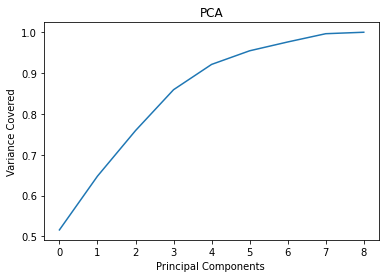

In [137]:
#lets plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))#cumsum=cummulative summention
plt.xlabel('Principal Components ')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()
#explained_variance_ratio_ = how much data variance u can explain if ur using on component 
#cumsum = it will increase its value by adding one + another data then another and so on 

In [138]:
pca=PCA(n_components=7)
new_pcomp=pca.fit_transform(X_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.101459,-2.082818,1.228980,-0.107343,0.558172,-0.714112,0.257251
1,-0.003728,-2.064706,0.448441,0.048544,0.527786,-0.845906,0.259203
2,0.749595,-2.001132,-0.427970,-0.163514,1.159196,-0.642585,0.792082
3,0.462892,-1.989498,-1.178249,0.115650,0.931629,-0.654857,0.480541
4,0.103445,-1.892355,1.410646,-0.396074,0.582852,-0.802479,0.243842
...,...,...,...,...,...,...,...
18058,-1.979551,2.335702,-1.150520,0.783403,0.180377,0.390476,-0.227690
18059,-2.054422,2.440319,1.529153,0.176420,-0.069365,0.304328,-0.047652
18060,-1.548031,2.350792,0.820256,0.553217,-0.746715,-0.478434,-0.060794
18061,-1.505451,2.369408,0.059661,0.794886,-0.921308,-0.448285,-0.111447


In [139]:
y=data['region']

In [140]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [141]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n===============Train Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        
        print('\n===============Test Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [142]:
from sklearn.svm import SVC
svc=SVC()
#svc model training and printing train and test score 
svc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :66.94%

===============Test Reasult=============
Accuracy SCore :58.95%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.37      0.37      0.37        82
         1.0       0.39      0.37      0.38       101
         2.0       0.75      0.84      0.79        80
         3.0       0.72      0.63      0.68        79
         4.0       0.44      0.61      0.51        75
         5.0       0.42      0.49      0.46        83
         6.0       0.80      0.78      0.79        81
         7.0       0.58      0.65      0.61        82
         8.0       0.85      0.95      0.90        82
         9.0       0.54      0.79      0.65        77
        10.0       0.48      0.46      0.47        99
        11.0       0.52      0.63      0.57        91
        12.0       0.58      0.59      0.58        99
        13.0       0.48      0.34      0.40        74
        14.0       0.67   

In [164]:
SVC_CVS=cross_val_score(svc,X_scaled,y,cv=10).mean()
SVC_CVS

0.5730402133698101

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()
#gbdt model training and printing train and test score 
gbdt.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :88.37%

===============Test Reasult=============
Accuracy SCore :54.74%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.41      0.43      0.42        82
         1.0       0.43      0.31      0.36       101
         2.0       0.73      0.76      0.74        80
         3.0       0.63      0.54      0.59        79
         4.0       0.46      0.61      0.53        75
         5.0       0.34      0.37      0.35        83
         6.0       0.72      0.63      0.67        81
         7.0       0.72      0.78      0.75        82
         8.0       0.89      0.78      0.83        82
         9.0       0.56      0.73      0.63        77
        10.0       0.46      0.37      0.41        99
        11.0       0.47      0.53      0.50        91
        12.0       0.47      0.46      0.47        99
        13.0       0.39      0.42      0.41        74
        14.0       0.58   

In [165]:
gbdt_csv=cross_val_score(gbdt,X_scaled,y,cv=10).mean()
gbdt_csv

0.632667717091341

In [146]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#lr model training and printing train and test score 
lr.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :28.83%

===============Test Reasult=============
Accuracy SCore :27.57%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.21      0.24      0.22        82
         1.0       0.17      0.09      0.12       101
         2.0       0.39      0.31      0.35        80
         3.0       0.25      0.35      0.29        79
         4.0       0.19      0.35      0.24        75
         5.0       0.13      0.06      0.08        83
         6.0       0.44      0.58      0.50        81
         7.0       0.33      0.50      0.39        82
         8.0       0.36      0.48      0.41        82
         9.0       0.20      0.35      0.26        77
        10.0       0.05      0.02      0.03        99
        11.0       0.22      0.23      0.22        91
        12.0       0.00      0.00      0.00        99
        13.0       0.12      0.19      0.14        74
        14.0       0.19   

In [147]:
lr_CSV=cross_val_score(lr,X_scaled,y,cv=10).mean()
lr_CSV

0.23041576703759062

In [148]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
#DTC model training and printing train and test score 
DTC.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(DTC,x_train,x_test,y_train,y_test,train=True)
print_score(DTC,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :58.30%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.47      0.44      0.45        82
         1.0       0.46      0.36      0.40       101
         2.0       0.65      0.81      0.72        80
         3.0       0.54      0.65      0.59        79
         4.0       0.54      0.67      0.60        75
         5.0       0.42      0.48      0.45        83
         6.0       0.70      0.65      0.68        81
         7.0       0.72      0.65      0.68        82
         8.0       0.80      0.80      0.80        82
         9.0       0.55      0.74      0.63        77
        10.0       0.47      0.44      0.46        99
        11.0       0.53      0.57      0.55        91
        12.0       0.66      0.62      0.64        99
        13.0       0.45      0.45      0.45        74
        14.0       0.47  

In [166]:
DTC_csv=cross_val_score(DTC,X_scaled,y,cv=10).mean()
DTC_csv

0.573817123147891

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#knn model training and printing train and test score 
knn.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :61.60%

===============Test Reasult=============
Accuracy SCore :34.32%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.22      0.37      0.27        82
         1.0       0.20      0.41      0.27       101
         2.0       0.28      0.57      0.37        80
         3.0       0.42      0.61      0.50        79
         4.0       0.24      0.43      0.30        75
         5.0       0.22      0.34      0.27        83
         6.0       0.49      0.63      0.55        81
         7.0       0.26      0.45      0.33        82
         8.0       0.61      0.60      0.60        82
         9.0       0.28      0.47      0.35        77
        10.0       0.13      0.19      0.16        99
        11.0       0.29      0.46      0.35        91
        12.0       0.30      0.35      0.32        99
        13.0       0.07      0.09      0.08        74
        14.0       0.48   

In [167]:
knn_csv=cross_val_score(knn,X_scaled,y,cv=10).mean()
knn_csv

0.3787785411844304

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rfc = RandomForestClassifier()
#knn model training and printing train and test score 
rfc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :72.54%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.59      0.60      0.59        82
         1.0       0.68      0.62      0.65       101
         2.0       0.85      0.95      0.90        80
         3.0       0.74      0.71      0.72        79
         4.0       0.59      0.68      0.63        75
         5.0       0.60      0.63      0.62        83
         6.0       0.81      0.77      0.78        81
         7.0       0.87      0.82      0.84        82
         8.0       0.89      0.93      0.91        82
         9.0       0.63      0.86      0.73        77
        10.0       0.62      0.65      0.63        99
        11.0       0.64      0.65      0.64        91
        12.0       0.73      0.75      0.74        99
        13.0       0.62      0.57      0.59        74
        14.0       0.81  

In [171]:
rfc_csv=cross_val_score(rfc,X_scaled,y,cv=10).mean()
rfc_csv

0.7019252372188627

In [172]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [156]:
gbdt_clf=GradientBoostingClassifier()

In [157]:
gbdt_clf=GradientBoostingClassifier()
#gbdt_clf model training and printing train and test score 
gbdt_clf.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :88.29%

===============Test Reasult=============
Accuracy SCore :55.00%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.41      0.39      0.40        82
         1.0       0.41      0.32      0.36       101
         2.0       0.71      0.75      0.73        80
         3.0       0.63      0.51      0.56        79
         4.0       0.48      0.61      0.54        75
         5.0       0.38      0.39      0.38        83
         6.0       0.72      0.63      0.67        81
         7.0       0.68      0.77      0.72        82
         8.0       0.89      0.78      0.83        82
         9.0       0.57      0.73      0.64        77
        10.0       0.46      0.37      0.41        99
        11.0       0.47      0.54      0.50        91
        12.0       0.51      0.49      0.50        99
        13.0       0.42      0.45      0.43        74
        14.0       0.54   

In [169]:
gbdt_clf_csv=cross_val_score(gbdt_clf,X_scaled,y,cv=5).mean()
gbdt_clf_csv

0.5705493788733254

In [173]:
#Cross validation score 
print('********* Cross Validation Score*********')
print('knn_csv --> ',knn_csv)
print('DTC_csv --> ',DTC_csv)
print('lr_CSV --> ',lr_CSV)
print('SVC_CVS --> ',SVC_CVS)
print('rfc_csv --> ',rfc_csv)
print('gbdt_clf_csv --> ',gbdt_clf_csv)

********* Cross Validation Score*********
knn_csv -->  0.3787785411844304
DTC_csv -->  0.573817123147891
lr_CSV -->  0.23041576703759062
SVC_CVS -->  0.5730402133698101
rfc_csv -->  0.7019252372188627
gbdt_clf_csv -->  0.5705493788733254


# TUNNING

In [174]:
rfc_clf=RandomForestClassifier() 
rfc_clf.fit(x_train,y_train)
pred=rfc_clf.predict(x_train)

In [175]:
rfc_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{rfc_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=rfc_clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")
print('Cross validation --> ',rfc_clf_report)


==================Train Result=============
Accuracy Score:100.00%
-----------------------------------------
Classification Report:
             0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0  \
precision    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
recall       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
f1-score     1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
support    256.0  231.0  258.0  250.0  263.0  252.0  256.0  248.0  256.0   

             9.0  ...   47.0   48.0   49.0   50.0   51.0   52.0   53.0  \
precision    1.0  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
recall       1.0  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
f1-score     1.0  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
support    261.0  ...  240.0  265.0  252.0  259.0  257.0  248.0  251.0   

           accuracy  macro avg  weighted avg  
precision       1.0        1.0           1.0  
recall          1.0  

In [176]:
from sklearn.model_selection import GridSearchCV

n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

I have tried to tune with the above data but i got low percentage after tunning , and it took so much of time 

# i have got 71.99 % of accuracy  by RandomForestClassifier

.

.

.

.

.

.

.

# REGRESSION MODEL

In [2]:
data=pd.read_csv(r'C:\Users\yoges\OneDrive\Desktop\avocado.csv')

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Regression model prediction by Average Price and Classification Model prediction by using Region 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Observations 

-No null

-11 numeric columns and 3 object columns 

- every feature has different scale range scalling can help

- Columns only informing about bags which not relevent for predictions anf Unamed feature is giving info about index so lets drop them 


In [7]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
data.drop(['Unnamed: 0','XLarge Bags','Small Bags','Total Bags','Large Bags'], axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [10]:
data.shape

(18249, 9)


So after dropping all the unnecessary column 18249 rows and only 9 columns in dataset

In [11]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,2018.000000


In [12]:

data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


lets divide dates ito date,month,year

In [13]:
data[['Date','Month','Year']] = data['Date'].str.split("-",expand = True)

In [14]:
data[['Date','Month','Year']] = data[['Year','Month','Date']].astype(int)

In [15]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Year
0,27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,12,2015
1,20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,12,2015
2,13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,12,2015
3,6,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,12,2015
4,29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,11,2015


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
 9   Month         18249 non-null  int32  
 10  Year          18249 non-null  int32  
dtypes: float64(5), int32(3), int64(1), object(2)
memory usage: 1.3+ MB


lets convert object into integer

as we already got year column in date so we gonna drop extra one year column 

In [17]:
data.drop(['year'],axis=1, inplace=True)

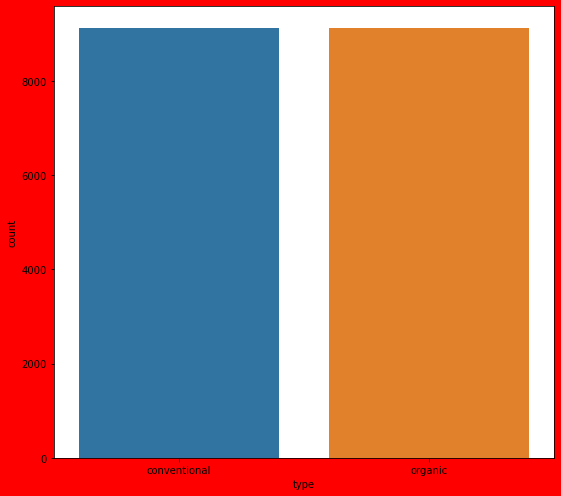

In [18]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['type']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['type'])
    plotnumber += 1
plt.tight_layout()

In [19]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [20]:
data['region'].nunique()

54

In [21]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

# EDA

In [22]:
data.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Month,Year
Date,1.000000,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,0.010621,0.004475
AveragePrice,0.027386,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,0.162409,0.093197
Total Volume,-0.009747,-0.192752,1.000000,0.977863,0.974181,0.872202,-0.024689,0.017193
4046,-0.010159,-0.208317,0.977863,1.000000,0.926110,0.833389,-0.025803,0.003353
4225,-0.012393,-0.172928,0.974181,0.926110,1.000000,0.887855,-0.022108,-0.009559
4770,-0.009009,-0.179446,0.872202,0.833389,0.887855,1.000000,-0.033424,-0.036531
Month,0.010621,0.162409,-0.024689,-0.025803,-0.022108,-0.033424,1.000000,-0.177050
Year,0.004475,0.093197,0.017193,0.003353,-0.009559,-0.036531,-0.177050,1.000000


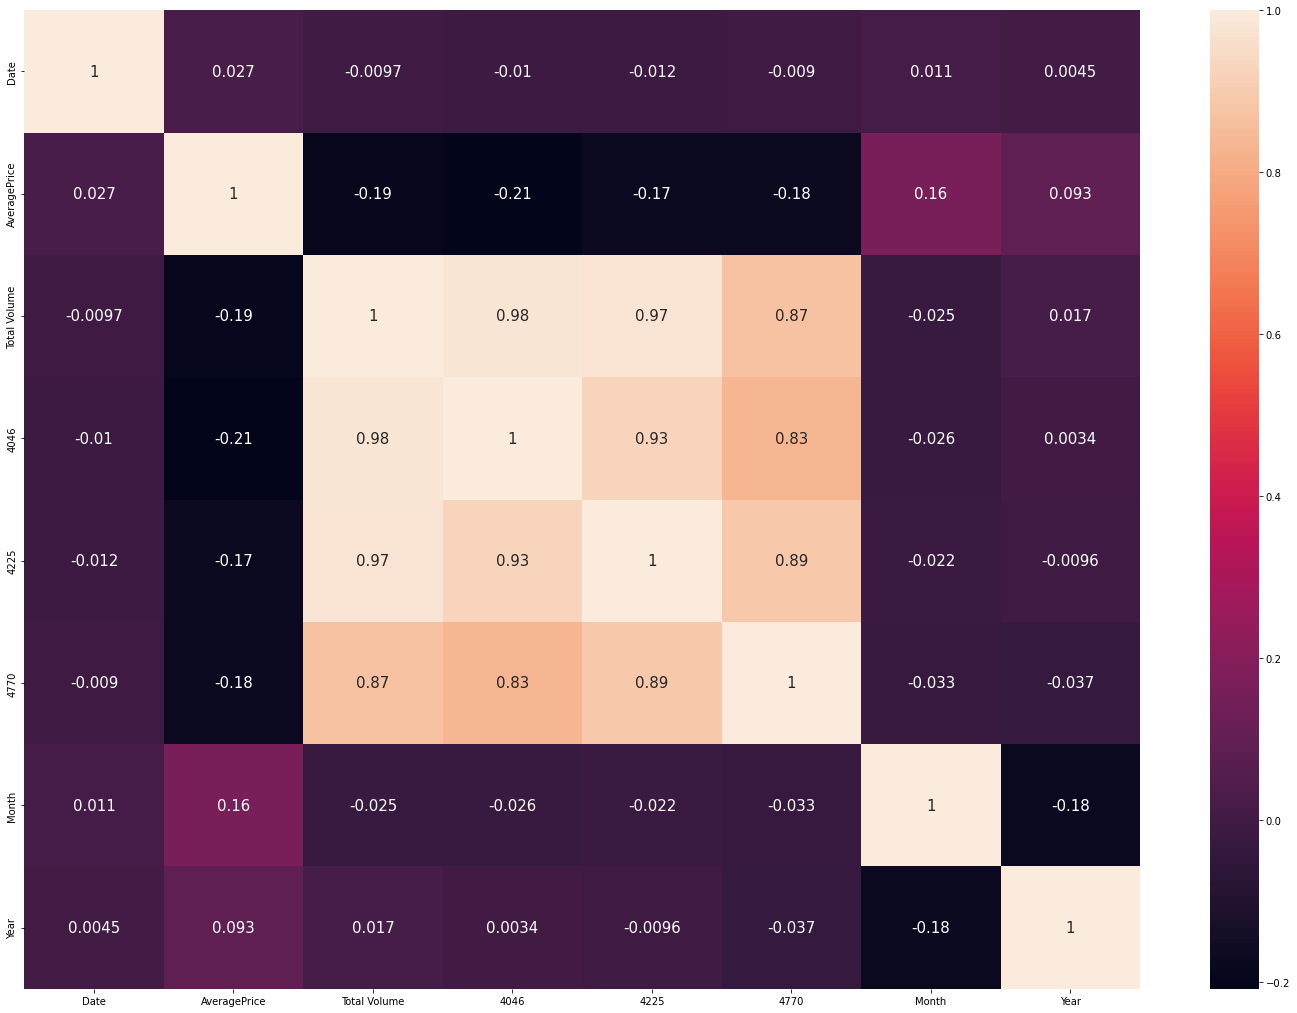

In [23]:
plt.figure(figsize = [25, 18])
sns.heatmap(data.corr(), annot = True,annot_kws={'size':15})
plt.show()


features-4046 ,4225,4770 are highly correlated with each other because they all are sold information

-Some of them are negatively correlated with data

-don't find see any column fairely correlated with Average price

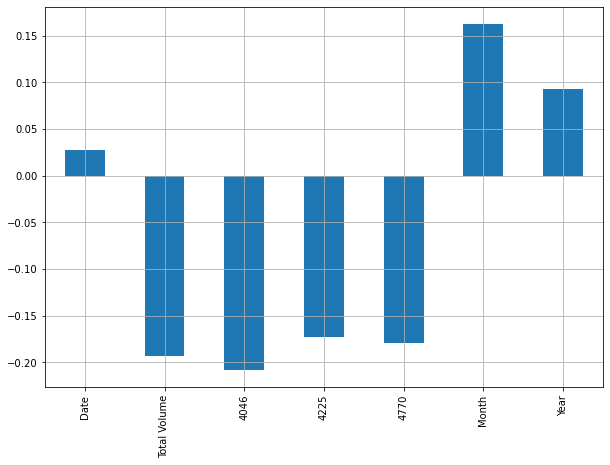

In [24]:
data.drop('AveragePrice',axis=1).corrwith(data.AveragePrice).plot(kind='bar',grid=True,figsize=(10,7),)
plt.show()

same here as heat map

<AxesSubplot:xlabel='Date', ylabel='Count'>

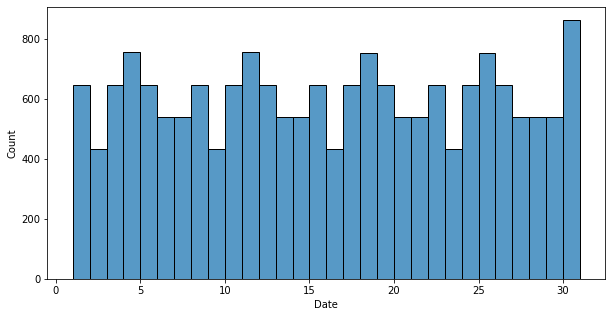

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(data['Date'], bins=30)

 * For every 6 day there is hike in sell i.e is may be on saturday or sunday 
 * daily sales range start from 40- 60 

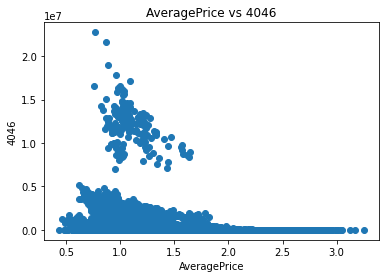

In [26]:
plt.scatter(data['AveragePrice'],data['4046'])
plt.xlabel('AveragePrice')
plt.ylabel('4046')
plt.title('AveragePrice vs 4046')
plt.show()

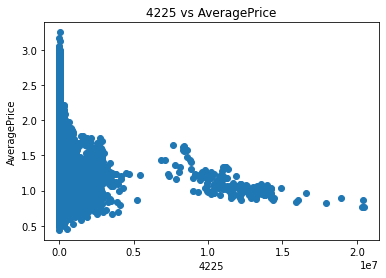

In [27]:
plt.scatter(data['4225'],data['AveragePrice'])
plt.xlabel('4225')
plt.ylabel('AveragePrice')
plt.title('4225 vs AveragePrice')
plt.show()

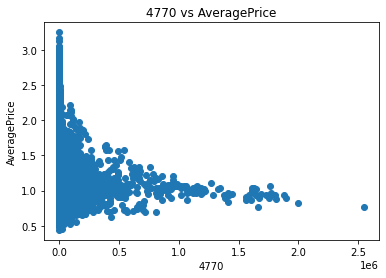

In [28]:
plt.scatter(data['4770'],data['AveragePrice'])
plt.xlabel('4770')
plt.ylabel('AveragePrice')
plt.title('4770 vs AveragePrice')
plt.show()

we can see outliers 

<AxesSubplot:xlabel='Year', ylabel='count'>

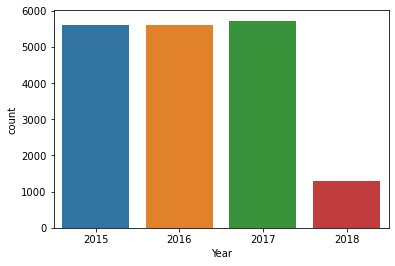

In [29]:
sns.countplot(x='Year',data=data)

minimum data is found in 2018

<AxesSubplot:xlabel='Month', ylabel='count'>

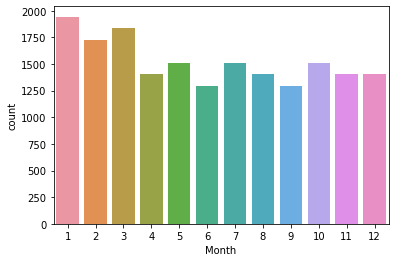

In [30]:
sns.countplot(x='Month',data=data)

maximum avocado are sold in month of 1,2,3 and minimum in the month of 6

In [31]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  object 
 7   region        18249 non-null  object 
 8   Month         18249 non-null  int32  
 9   Year          18249 non-null  int32  
dtypes: float64(5), int32(3), object(2)
memory usage: 1.2+ MB


In [32]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [33]:
ord_enc=OrdinalEncoder(categories=[['conventional','organic']])
df1=ord_enc.fit_transform(data[['type']])
df1

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [34]:
data['type']=df1

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  float64
 7   region        18249 non-null  object 
 8   Month         18249 non-null  int32  
 9   Year          18249 non-null  int32  
dtypes: float64(6), int32(3), object(1)
memory usage: 1.2+ MB


In [36]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
data['region']=le.fit_transform(data['region'])

In [37]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,Month,Year
0,27,1.33,64236.62,1036.74,54454.85,48.16,0.0,0,12,2015
1,20,1.35,54876.98,674.28,44638.81,58.33,0.0,0,12,2015
2,13,0.93,118220.22,794.70,109149.67,130.50,0.0,0,12,2015
3,6,1.08,78992.15,1132.00,71976.41,72.58,0.0,0,12,2015
4,29,1.28,51039.60,941.48,43838.39,75.78,0.0,0,11,2015
...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,1.0,53,2,2018
18245,28,1.71,13888.04,1191.70,3431.50,0.00,1.0,53,1,2018
18246,21,1.87,13766.76,1191.92,2452.79,727.94,1.0,53,1,2018
18247,14,1.93,16205.22,1527.63,2981.04,727.01,1.0,53,1,2018


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  float64
 7   region        18249 non-null  int32  
 8   Month         18249 non-null  int32  
 9   Year          18249 non-null  int32  
dtypes: float64(6), int32(4)
memory usage: 1.1 MB


Now everthing is in numbers 

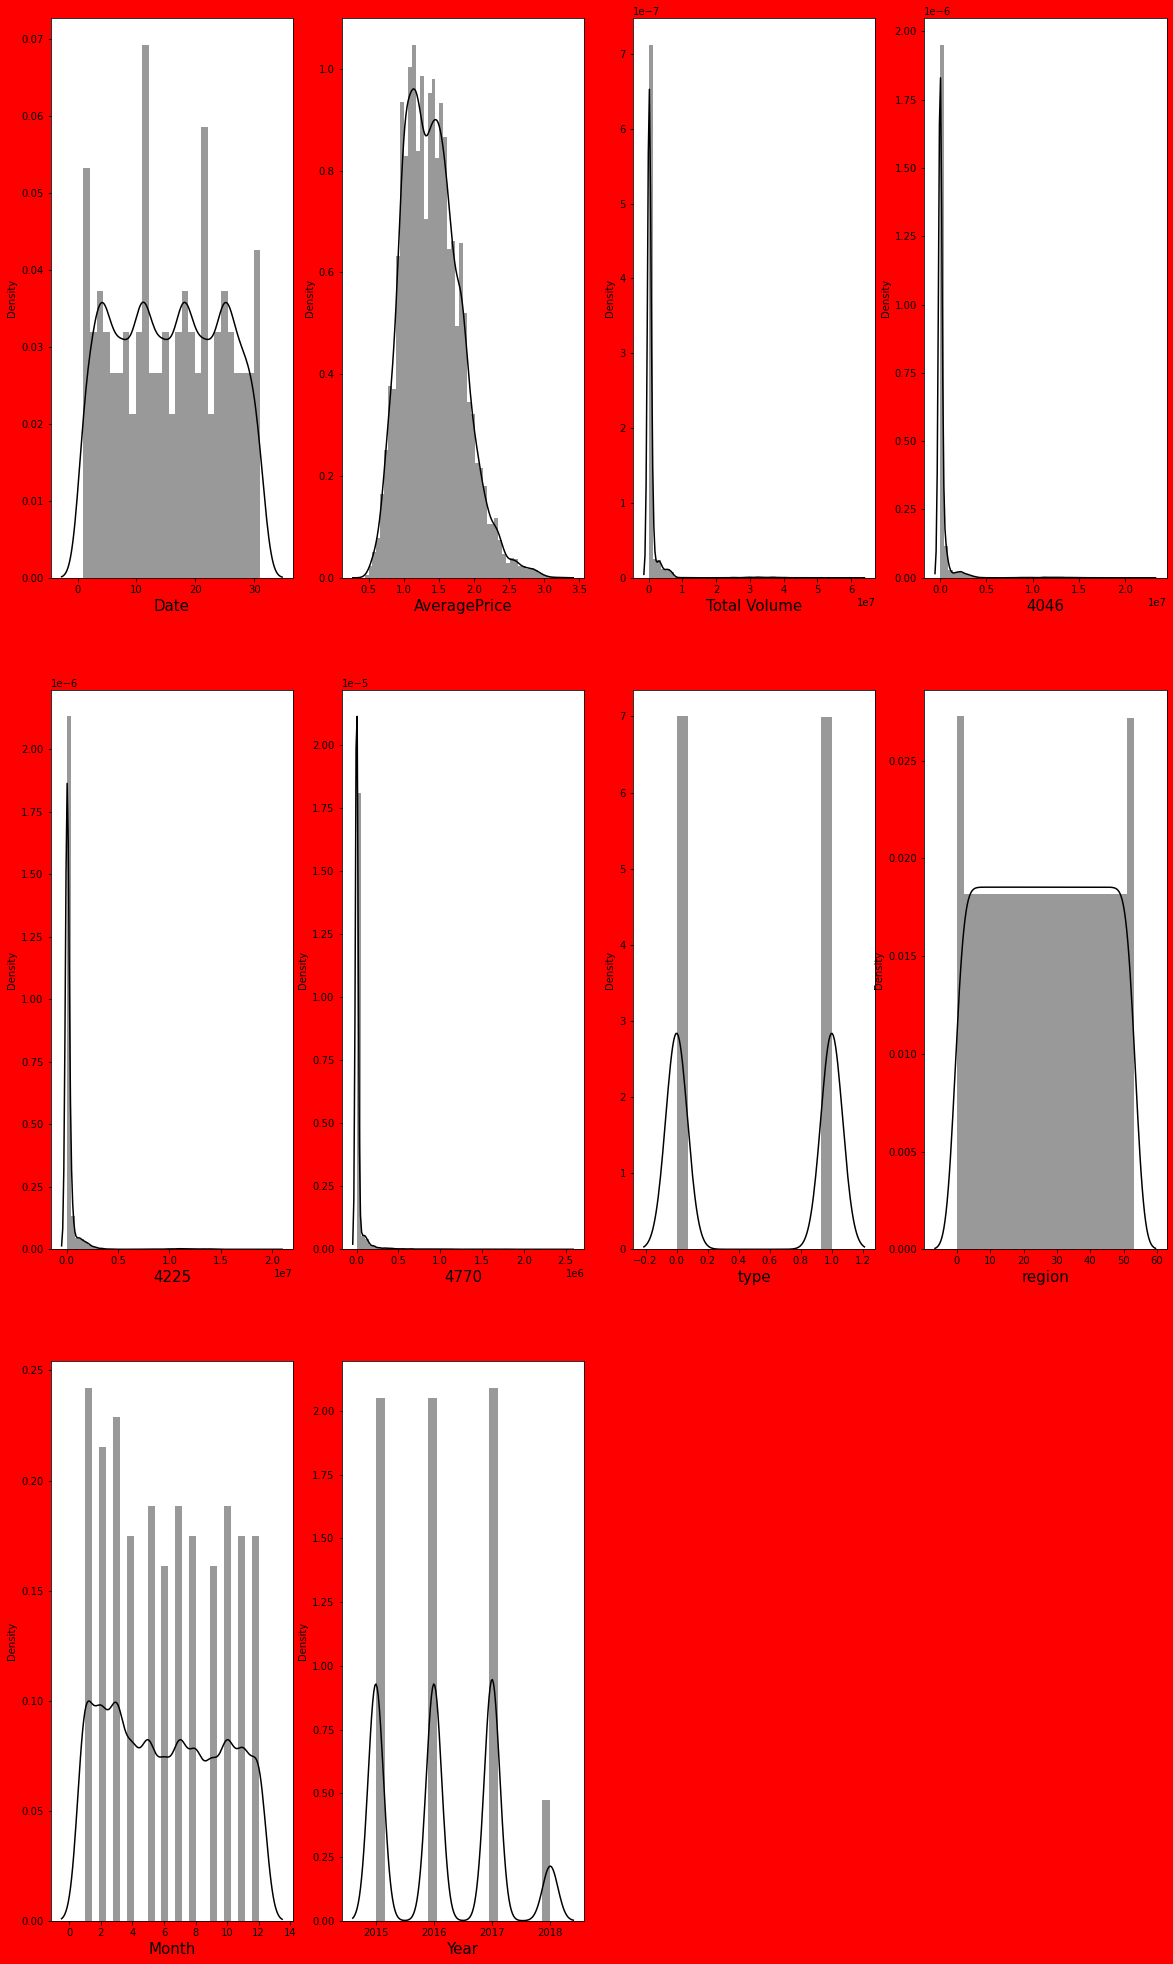

In [42]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

everthing looks finr other than 4046 ,4225,4770  because they all are sold information

aerage price is feature so we can ignore 

# Skweness

In [43]:
#Checking for Skewness
data.skew()

Date             0.014310
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
type             0.000329
region           0.000030
Month            0.106617
Year             0.215339
dtype: float64

# Power Transform for removing the skweness 

In [44]:
scaler=PowerTransformer(method='yeo-johnson')

In [45]:
data[['Total Volume','4046','4225','4770']] = scaler.fit_transform(data[['Total Volume','4046','4225','4770']].values)

In [46]:
data.skew()

Date            0.014310
AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
type            0.000329
region          0.000030
Month           0.106617
Year            0.215339
dtype: float64

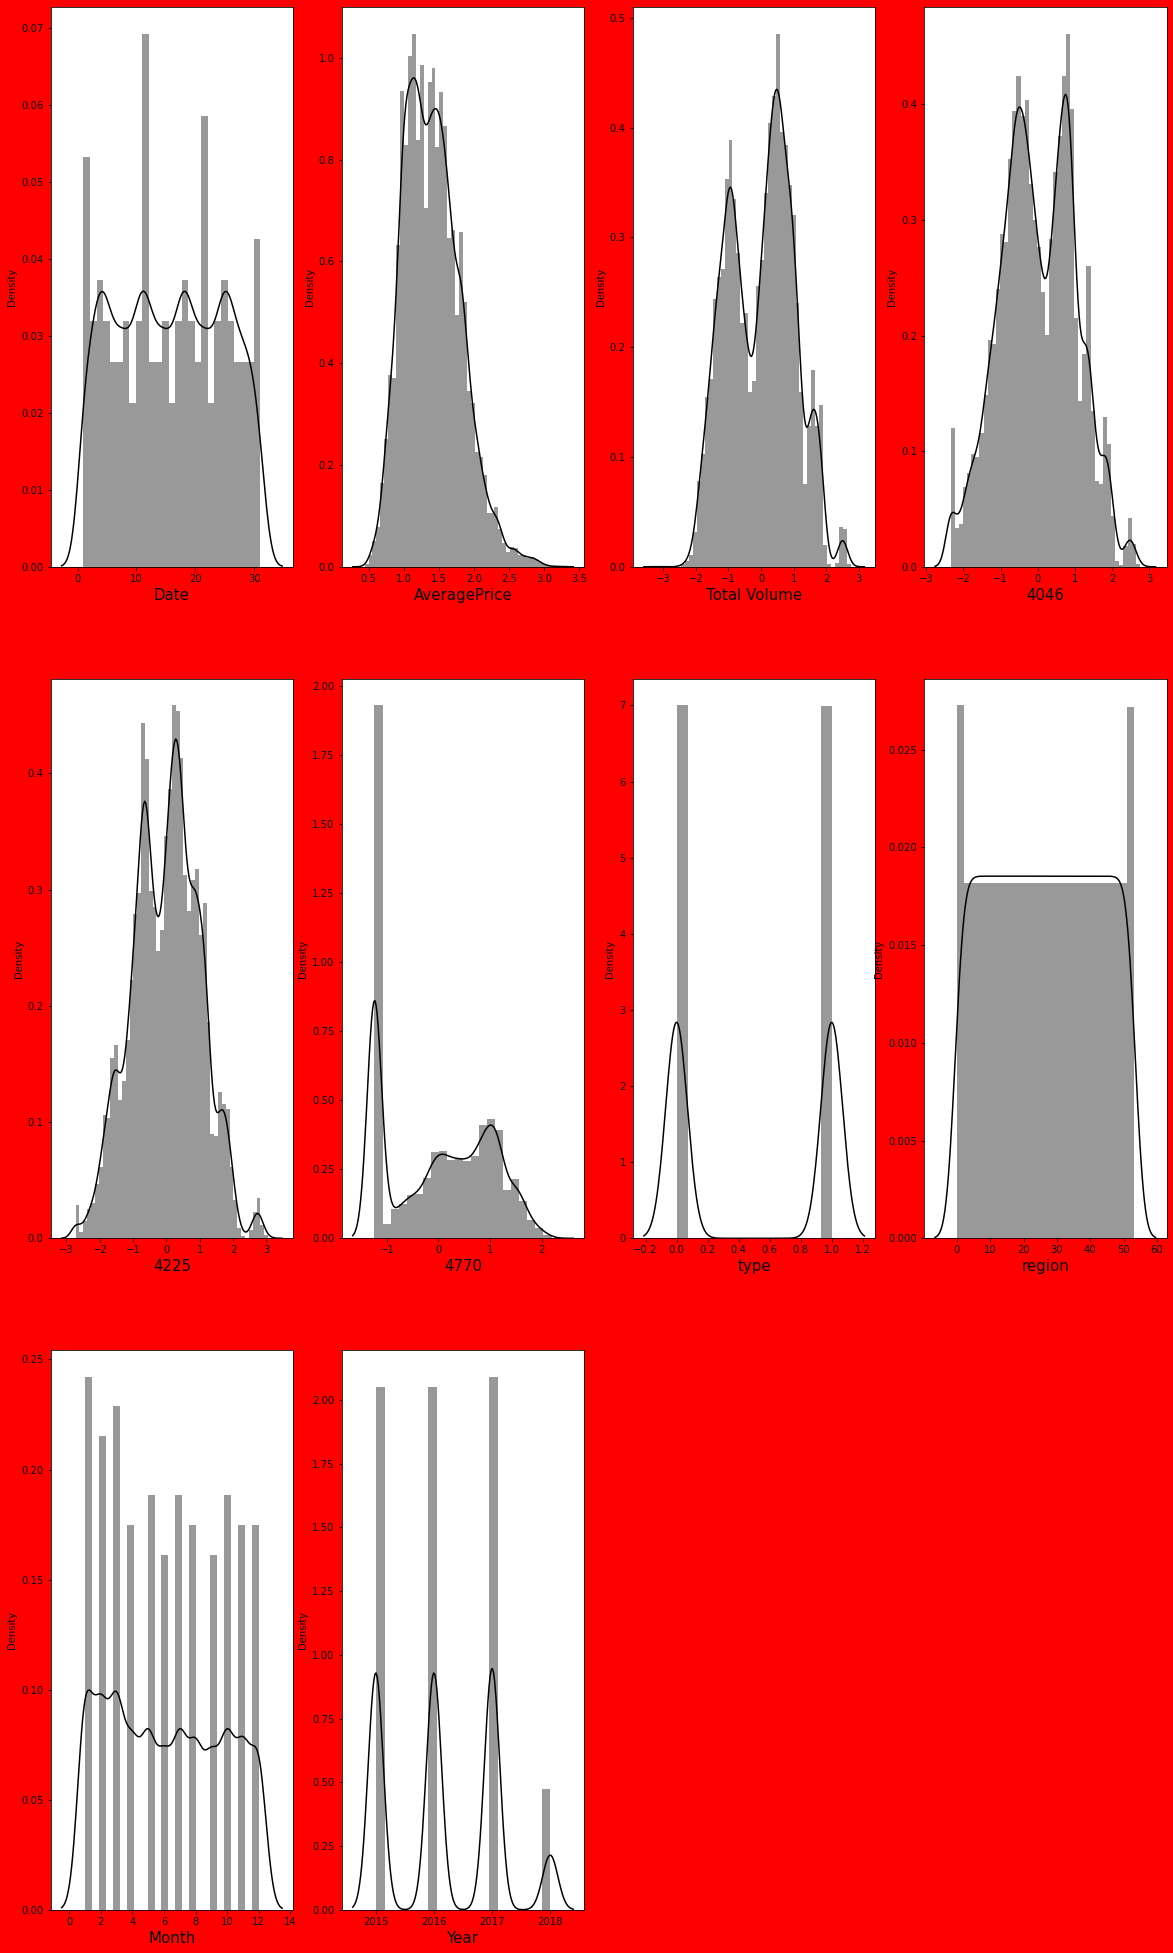

In [47]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

so we see we remobed the skweness

# OUTLIERS

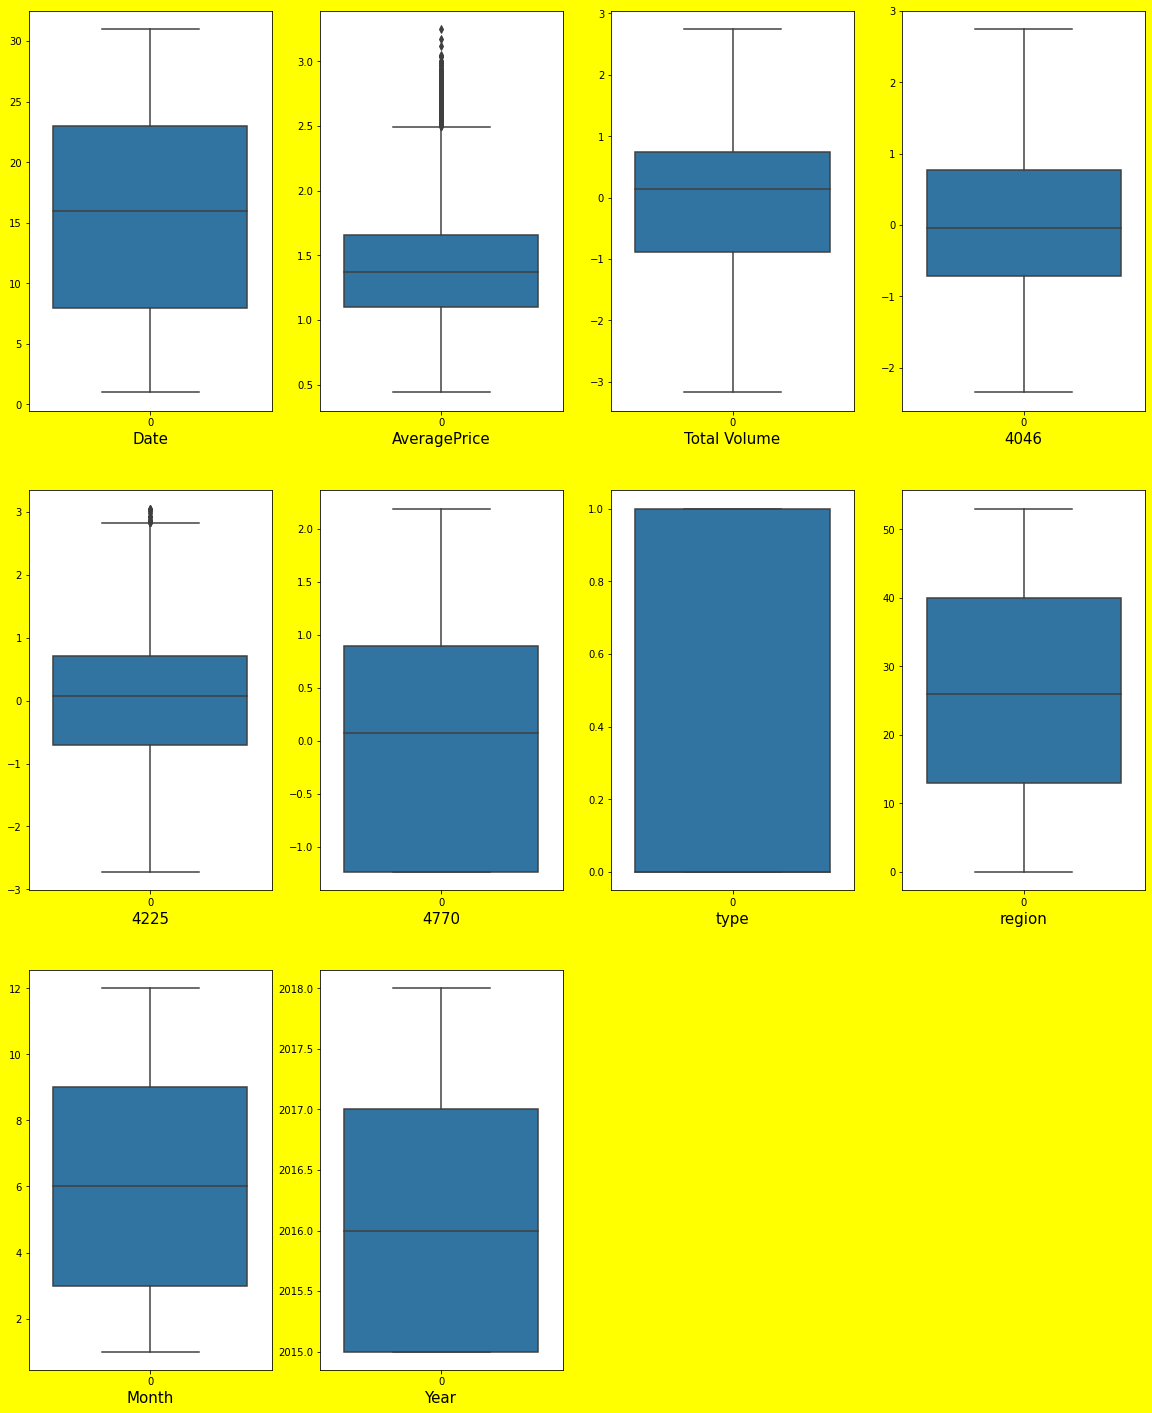

In [48]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1
for column in data:
    if graph<=17:
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [49]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type',
       'region', 'Month', 'Year'],
      dtype='object')

In [50]:
from scipy.stats import zscore
z_score= zscore(data[['4225']])
abs_z_score=np.abs(z_score) #apply he formula and get the scaled data 

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,Month,Year
count,18245.000000,18245.000000,18245.000000,18245.000000,18245.000000,18245.000000,18245.000000,18245.000000,18245.000000,18245.000000
mean,15.665114,1.406106,-0.000591,-0.000590,-0.000667,-0.000459,0.500027,26.490271,6.178131,2016.147821
std,8.775557,0.402627,0.999340,0.999343,0.999122,0.999655,0.500014,15.581271,3.533976,0.939881
min,1.000000,0.440000,-3.172920,-2.343573,-2.725056,-1.238310,0.000000,0.000000,1.000000,2015.000000
25%,8.000000,1.100000,-0.879699,-0.712367,-0.707679,-1.238310,0.000000,13.000000,3.000000,2015.000000
50%,16.000000,1.370000,0.137295,-0.044877,0.071340,0.076126,1.000000,26.000000,6.000000,2016.000000
75%,23.000000,1.660000,0.735277,0.766011,0.707753,0.897123,1.000000,40.000000,9.000000,2017.000000
max,31.000000,3.250000,2.639381,2.644951,2.980160,2.143236,1.000000,53.000000,12.000000,2018.000000


In [51]:
data.shape

(18245, 10)

- we see outliers in the label column which we can ignore 
- we see outliers in 4225 

In [52]:
x=data.drop(['AveragePrice'],axis=1)
y=data['AveragePrice']

In [53]:
scaler =StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [54]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,1.000519,Date
1,18.869364,Total Volume
2,6.206337,4046
3,8.583833,4225
4,3.964688,4770
5,3.273959,type
6,1.093976,region
7,1.038812,Month
8,1.172504,Year


Total Volume can be ignored as  Total number of avocados sold

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

# AdaBoostRegressor

In [56]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=ada.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.5456006872754331
Test accuracy  -  0.5321806128461728


In [57]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=lr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.5202119455200638
Test accuracy  -  0.5147603680403575


In [58]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=dt.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 1.0
Test accuracy  -  0.7835318445864534


In [59]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=knn.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.6903299436060824
Test accuracy  -  0.5207071720251429


In [60]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=gbr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.7366710688502689
Test accuracy  -  0.7214123736811957


In [61]:
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=svr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.03714159934313488
Test accuracy  -  0.03226111292415479


In [62]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=rf.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)


Train accuracy  - 0.9841946412305688
Test accuracy  -  0.8922401669401147


In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param ={'criterion':['mse','mae']} # i have tried with many others but ended up with low accuracy 

i tried other paramters after a 20 min i ended up with so using these 2 parameters only

In [66]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)

In [67]:
RF_grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae']})

In [68]:
RF_grid.best_estimator_

RandomForestRegressor()

In [73]:
RF_model=RandomForestRegressor(criterion='mae')
RF_model.fit(x_train,y_train)

RandomForestRegressor(criterion='mae')

In [74]:
pred=RF_model.predict(x_test)

In [75]:
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 88.23001313198289


In [76]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=rf.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)


Train accuracy  - 0.984425514944138
Test accuracy  -  0.8924402744600428


# Without Tunning we are getting 89.2 % accuracy

# Model Saving

In [178]:
pickle.dump(rfc_csv,open('Avacado.pickle','wb'))

In [179]:
loaded_model=pickle.load(open('Avacado.pickle','rb'))